# Programming Assignment: Implementing the K-means Clustering Algorithm

## Cluster Analysis in Data Mining Course - Coursera

* Author: Michael Onishi
* Date: October 29th, 2019

## Description
In this programming assignment, you are required to implement the k-means algorithm and apply it to a real-life data set.

### Input
The provided input file ("places.txt") consists of the locations of 300 places in the US. Each location is a two-dimensional point that represents the longitude and latitude of the place. For example, "-112.1,33.5" means the longitude of the place is -112.1, and the latitude is 33.5.

### Output
You are required to implement the k-means algorithm and use it to cluster the 300 locations into three clusters, such that the locations in the same cluster are geographically close to each other.

After reading in the 300 locations in "places.txt" and applying the k-means algorithm (with k = 3), you are required to generate an output file named "clusters.txt". The output file should contain exactly 300 lines, where each line represents the cluster label of each location. Every line should be in the format: location_id cluster_label.

An example snippet of the output "clusters.txt" file is provided below:

0 1

1 0

2 1

3 2

4 0

In the above, the five lines denote the cluster ids of the first five locations in the input file, which means:

The first location belongs to cluster "1"

The second location belongs to cluster "0"

The third location belongs to cluster "1"

The fourth location belongs to cluster "2"

The fifth location belongs to cluster "0"

In [1]:
#! wget -O places.txt "https://d3c33hcgiwev3.cloudfront.net/_65d999cccd24abb4ce496639c708f4fe_places.txt?Expires=1572480000&Signature=FcY6lkRYgZ0dGG1rLQshet-YifayD-7IQry55Tfsce0q-gczy0dkPtdgG1YM2uH32ZFuO4O~k5dnZGhqtqMz1smtwZZckR8pl3ZiQzpFSf8xX4lTNEzJI9GhSPbAnIsuYCLvp~ThvnAsQceZtl3TCm52gwLWZ0p-L0BT-MYw~VA_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A"

In [2]:
import numpy as np

records = []
with open('places.txt') as in_file:
  for line in in_file:
    records.append([float(x) for x in line.strip().split(",")])
records = np.array(records)

In [3]:
print(records[:5])
print(len(records))

[[-112.0707922   33.4516246]
 [-112.0655423   33.4492979]
 [-112.0739312   33.4564905]
 [-112.0748658   33.4701155]
 [ -80.5256905   43.4770992]]
300


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

def plot(X, Y = None, centroids = None):
  plt.scatter(X[:, 0], X[:, 1], s=50, c=Y, cmap='viridis');

  if centroids is not None:
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.1);

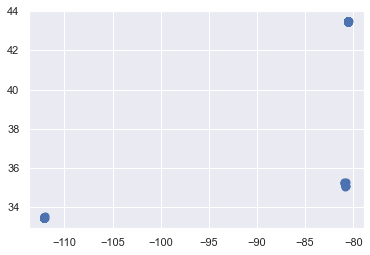

In [5]:
plot(records)

In [6]:
from random import sample 

N = len(records)
K = 3

In [7]:
best_ans = None
global_min = float("inf")
eps = 0.0001
# repeat the procedure some times to get some distinct initializations
for _ in range(1000):
  prev_sum = float("inf")
  centroids = records[sample(range(N), K)]
  ans = None
  for _ in range(1000):
    # assign each point to the closest centroid
    dist = np.array([np.linalg.norm(records - centroids[i], axis = 1) for i in range(K)])
    ans = np.argmin(dist, axis=0)

    new_sum = sum([np.linalg.norm(records[ans == i] - centroids[i], axis = 1).sum() for i in range(K)])
    
    if (prev_sum - new_sum) < eps:
      break
    prev_sum = new_sum

    # calculate new centroids
    centroids = np.array([records[ans == i].mean(axis=0) for i in range(K)])

  if new_sum < global_min:
    print('new global min ', new_sum)
    global_min = new_sum
    best_ans = ans

new global min  5.1165520624676075


<ipython-input-7-f7b861acaa61>:21: RuntimeWarning: Mean of empty slice.
  centroids = np.array([records[ans == i].mean(axis=0) for i in range(K)])
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


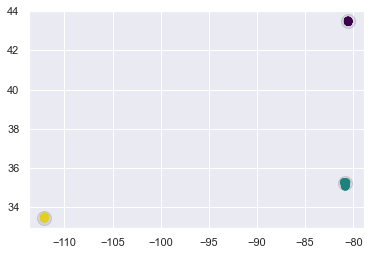

In [8]:
plot(records, best_ans, centroids)

In [9]:
with open('clusters.txt', 'w') as out_file:
  for i in range(N):
    out_file.write(f"{i} {best_ans[i]}\n")